In [1]:
import multiprocessing as mp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.patches as mpatches
import random

In [2]:
random.seed(42)
np.random.seed(42)

[np.log(np.mean(np.random.normal(lamb,1,d))**2) for i in range(100)]

In [3]:
def upper(d,lamb,n): 
  #k=1 #np.exp(np.abs(np.mean(np.array([np.log(np.random.normal(lamb,1/np.sqrt(d),d)**2) for i in range(10000)]))))
  #print(k)
  return n/np.exp(.5*d*lamb**2)

In [4]:
def ess(d,lamb,n):
  return n/np.exp(d*lamb**2)

In [5]:
def need(d,lamb,ess):
  return ess*np.exp(d*lamb**2)

In [6]:
def D(d,lamb,n):
  return d*lamb**2

In [7]:
def w(x,l,d):
  return np.exp(l*np.sum(x)-.5*(d*l**2))

In [8]:
def curve(d,ll,b):
    np.random.seed(b)
    l=lamb[ll]

    X_train=np.random.normal(0,1,m_train*d).reshape((m_train,d))
    y_train=np.array([np.random.normal(100*x,1) for x in X_train[:,0]])
    w_train=np.array([w(x,l,d) for x in X_train])

    X_test=np.random.normal(0,l*1,m_test*d).reshape((m_test,d))
    y_test=np.array([np.random.normal(100*x,1) for x in X_test[:,0]])

    model=DecisionTreeRegressor(min_samples_leaf=10, random_state=42)
    model.fit(X_train[:,:],y_train,sample_weight=w_train)
    y_pred=model.predict(X_test[:,:])

    return np.sqrt(mean_squared_error(y_test, y_pred))

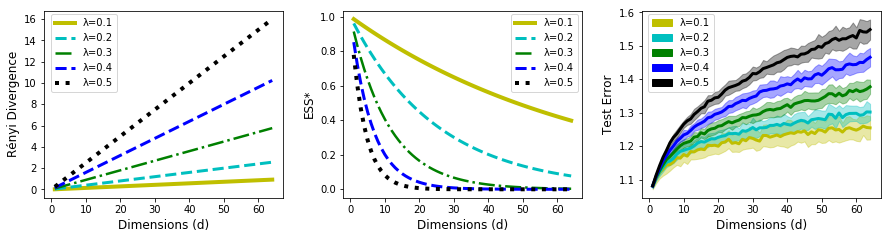

CPU times: user 1min 19s, sys: 3min 14s, total: 4min 34s
Wall time: 3h 38min 18s


In [9]:
%%time
plt.figure(figsize=(15,3.25))

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.25   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)

####

x=list(range(1,65))
n=1
essn=100

lamb1=0.12
lamb2=.2
lamb3=.3
lamb4=.4
lamb5=.5

####
plt.subplot(1, 3, 2)

y1=[ess(d,lamb1,n) for d in x]
y2=[ess(d,lamb2,n) for d in x]
y3=[ess(d,lamb3,n) for d in x]
y4=[ess(d,lamb4,n) for d in x]
y5=[ess(d,lamb5,n) for d in x]

plt.plot(x,y1,'y', lw=4, label='λ='+str(0.1))
plt.plot(x,y2,'c--', lw=3, label='λ='+str(lamb2))
plt.plot(x,y3,'g-.', lw=2.5, label='λ='+str(lamb3))
plt.plot(x,y4,'b--', lw=3, label='λ='+str(lamb4))
plt.plot(x,y5,'k:', lw=4, label='λ='+str(lamb5))

plt.xlabel('Dimensions (d)', size=12)
plt.ylabel('ESS*', size=12)
plt.legend(bbox_to_anchor=(.705, .98), loc='upper left', borderaxespad=.0)


####
plt.subplot(1, 3, 3)

dim=list(range(1,65))
B=50
m_train=7500
m_test=850000
cols={5:'k',4:'b' ,3:'g', 2:'c' ,1:'y'}
lamb={1:0.1,2:.2 ,3:.3, 4:.4 ,5:.5}

for ll in [1,2,3,4,5]:
  losses1=[]

  for b in range(B):
    #
    pool = mp.Pool(mp.cpu_count())
    losses2 = pool.starmap(curve, [(d, ll, b) for d in dim]) #starmap
    pool.close()
    
    losses1.append(losses2)

  losses1=np.array(losses1)

  m=np.mean(losses1, axis=0)
  err=np.std(losses1, axis=0)

  plt.plot(dim, m, cols[ll], lw=3)
  plt.fill_between(dim, m-err, m+err, color=cols[ll], alpha=0.35)
 
    
l1 = mpatches.Patch(color=cols[1], label='λ='+str(lamb[1]))
l2 = mpatches.Patch(color=cols[2], label='λ='+str(lamb[2]))
l4 = mpatches.Patch(color=cols[3], label='λ='+str(lamb[3]))
l3 = mpatches.Patch(color=cols[4], label='λ='+str(lamb[4]))
l5 = mpatches.Patch(color=cols[5], label='λ='+str(lamb[5]))

plt.xlabel('Dimensions (d)', size=12)
plt.ylabel('Test Error', size=12)
plt.legend(bbox_to_anchor=(.025, .98), loc='upper left', borderaxespad=.0,handles=[l1,l2,l4,l3,l5])

#####
plt.subplot(1, 3, 1)

y1=[D(d,lamb1,n) for d in x]
y2=[D(d,lamb2,n) for d in x]
y3=[D(d,lamb3,n) for d in x]
y4=[D(d,lamb4,n) for d in x]
y5=[D(d,lamb5,n) for d in x]

plt.plot(x,y1,'y', lw=4, label='λ='+str(0.1))
plt.plot(x,y2,'c--', lw=3, label='λ='+str(lamb2))
plt.plot(x,y3,'g-.', lw=2.5, label='λ='+str(lamb3))
plt.plot(x,y4,'b--', lw=3, label='λ='+str(lamb4))
plt.plot(x,y5,'k:', lw=4, label='λ='+str(lamb5))

plt.xlabel('Dimensions (d)', size=12)
plt.ylabel('Rényi Divergence', size=12)
plt.legend(bbox_to_anchor=(.03, .98), loc='upper left', borderaxespad=.0)

plt.savefig('plots/d_full.png', bbox_inches='tight',dpi=200, transparent=True)
plt.show()